# Building a Clustering Model for Customer Segmentation

# Import software libraries and load the dataset #

In [1]:
import sys                                             # Read system parameters.
import os                                              # Interact with the operating system.
import numpy as np                                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                                    # Manipulate and analyze data.
import matplotlib as mpl                               # Create 2D charts.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import yellowbrick                                     # Visualize elbow and silhouette plots.
import sklearn                                         # Perform data mining and analysis.
import seaborn as sns

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- Yellowbrick {}'.format(yellowbrick.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

# Load the dataset.
#PROJECT_ROOT_DIR = "."
#DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "wholesale_customers_data")
#print('Data files in this project:', os.listdir(DATA_PATH))
#data_raw_file = os.path.join(DATA_PATH, 'wholesale_customers_data.csv')
df = pd.read_csv('wholesale_customers_data.csv')
print('Loaded {} records'.format(len(df), df))

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Libraries used in this project:
- Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.19.2
- pandas 1.1.3
- Matplotlib 3.3.2
- Yellowbrick 1.2
- scikit-learn 0.23.2

Loaded 440 records


# Get acquainted with the dataset

In [2]:
# View data types and see if there are missing entries.

df.info()

# View first 10 records.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Deli              440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [3]:
df.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


# Examine the distribution of various features

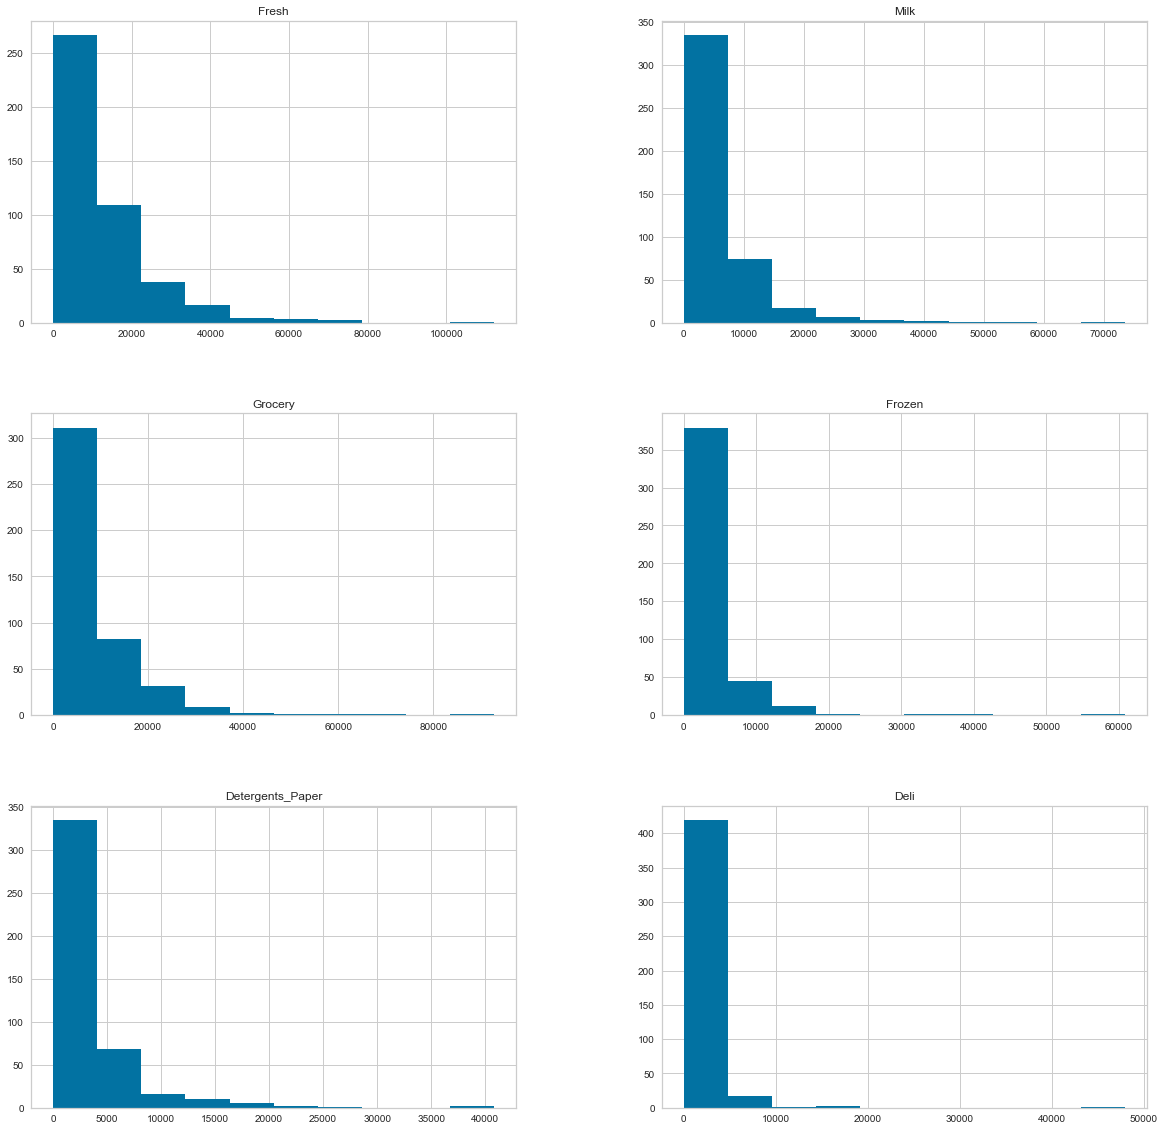

In [4]:
# Use Matplotlib to plot distribution histograms for all features.

df.hist(figsize=(20,20))
plt.show()

# Examine a general summary of statistics

In [5]:
# View summary statistics (mean, standard deviation, min, max, etc.) for each feature.
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Use a *k*-means model to label every row in the dataset

In [6]:
# Construct a k-means clustering model class object.
# Use 3 as the initial number of clusters.

# Use fresh products and milk products only for the initial training data.

# Fit the training data to the clustering object.

# Predict the cluster labels based on the training data.

In [7]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [8]:
df2 = df[["Fresh","Milk"]]

In [9]:
df2.head()

,Fresh,Milk
0,12669,9656
1,7057,9810
2,6353,8808
3,13265,1196
4,22615,5410


In [10]:
scaler = StandardScaler()

In [11]:
df2_scaled = scaler.fit_transform(df2)

In [12]:
df2_scaled

array([[ 5.29331898e-02,  5.23567773e-01],
       [-3.91301970e-01,  5.44457667e-01],
       [-4.47029261e-01,  4.08537706e-01],
       [ 1.00111407e-01, -6.24019925e-01],
       [ 8.40239480e-01, -5.23964546e-02],
       [-2.04805527e-01,  3.34066589e-01],
       [ 9.95035090e-03, -3.52315651e-01],
       [-3.49981451e-01, -1.13980948e-01],
       [-4.77900913e-01, -2.91409401e-01],
       [-4.74497115e-01,  7.18494904e-01],
       [-6.83474454e-01, -5.33459952e-02],
       [ 9.06915953e-02, -6.33786629e-01],
       [ 1.56049887e+00,  8.84800166e-01],
       [ 7.29576481e-01,  5.58511794e-02],
       [ 1.00156365e+00,  4.97658878e-01],
       [-1.38312738e-01, -6.35143116e-01],
       [-8.69179316e-01,  4.09622895e-01],
       [-4.84787666e-01,  4.89330975e-02],
       [ 5.22498936e-01,  7.19933704e-02],
       [-3.34070677e-01, -4.47812310e-01],
       [ 4.38987159e-01, -1.73259414e-01],
       [-5.09247514e-01, -6.68105741e-01],
       [ 1.52582763e+00, -5.26217238e-01],
       [ 1.

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [14]:
kmeans.fit(df2_scaled)

KMeans(n_clusters=3, random_state=0)

In [15]:
kmeans.predict(df2_scaled)

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,

In [16]:
kmeans.cluster_centers_

array([[ 0.05716626,  3.3479732 ],
       [ 1.68779057, -0.10761111],
       [-0.35366401, -0.18028656]])

In [17]:
clusterlabels = kmeans.predict(df2_scaled)

# Attach cluster labels to the original dataset

In [18]:
# Append the cluster labels to a new column in the original dataset.

# Show a preview of rows in the dataset with cluster labels added.

df2

,Fresh,Milk
0,12669,9656
1,7057,9810
2,6353,8808
3,13265,1196
4,22615,5410
...,...,...
435,29703,12051
436,39228,1431
437,14531,15488
438,10290,1981


In [19]:
df2["c_label"] = clusterlabels.copy()

<ipython-input-19-602f1198b807>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["c_label"] = clusterlabels.copy()


In [20]:
df2

,Fresh,Milk,c_label
0,12669,9656,2
1,7057,9810,2
2,6353,8808,2
3,13265,1196,2
4,22615,5410,1
...,...,...,...
435,29703,12051,1
436,39228,1431,1
437,14531,15488,2
438,10290,1981,2


# Show clusters of customers based on fresh products and milk products sales

In [21]:
# Use Matplotlib to create a scatter plot of customer data.
# Use fresh products as the x-axis and milk products as the y-axis.
# Distinguish clusters by color.


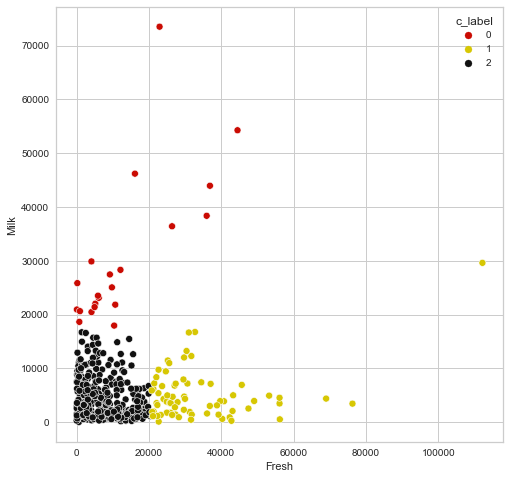

In [22]:
plt.figure(figsize=(8,8))

sns.scatterplot(x=df2.Fresh, y=df.Milk, data=df2, hue=df2.c_label, palette=['r','y','k'])

plt.show()

# Use the elbow method to determine the optimal number of clusters

In [23]:
# Set new DataFrame 'X' equal to the full dataset (all features).

# Use Yellowbrick to generate the elbow plot for 1 to 10 clusters on the full training data.

from yellowbrick.cluster import KElbowVisualizer

In [24]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [25]:
X = scaler.fit_transform(df)

In [26]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

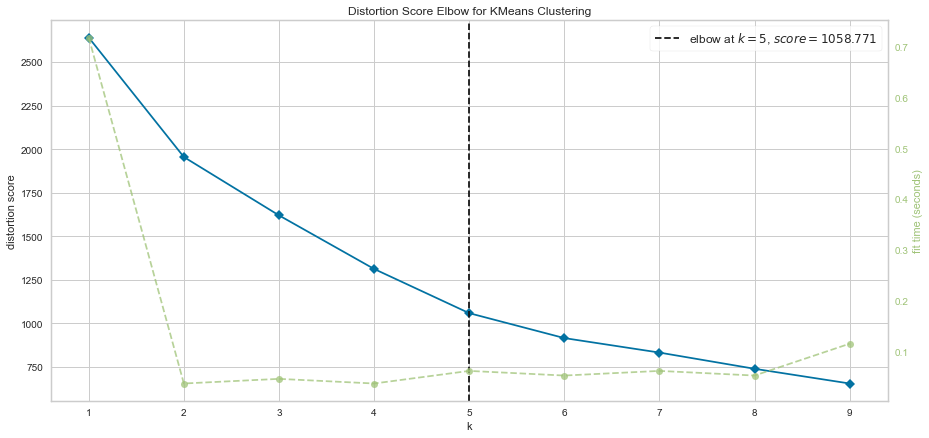

In [27]:
plt.rcParams["figure.figsize"] = (15, 7)

visualizer = KElbowVisualizer(KMeans(init = 'k-means++', random_state = 0), k = (1, 10))
visualizer.fit(X)
visualizer.poof();

# Use silhouette analysis to determine the optimal number of clusters

In [28]:
# Create several k-means models and generate the silhouette scores for each.
# Create the models using a range of 2 to 5 clusters.

# Note the high score.

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [29]:
# The number of clusters to try out.
range_n_clusters = [2, 3, 4, 5]

In [30]:
for n in range_n_clusters:

    kmeans = KMeans(n_clusters = n, random_state = 10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('\nWith {} clusters:'.format(n))
    print('   - Average silhouette score:', silhouette_avg)


With 2 clusters:
   - Average silhouette score: 0.5909041986285453

With 3 clusters:
   - Average silhouette score: 0.5391263624188073

With 4 clusters:
   - Average silhouette score: 0.3964105754321127

With 5 clusters:
   - Average silhouette score: 0.3690403826812808


# Generate and preview cluster labels using the full dataset

In [31]:
# Construct a k-means clustering model class object and fit the full training data to it.
# Use your judgment to determine the desired number of clusters.

# Predict the cluster labels based on the full training data, then append the labels to the dataset.

# Show the first 20 rows in the dataset with cluster labels added.

In [32]:
kmeans = KMeans(n_clusters = 2, random_state = 0)
cluster_labels = kmeans.fit_predict(X)

In [33]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [34]:
table = df.copy()

In [35]:
df["c_label"] = cluster_labels.copy()

In [36]:
df.head(20)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli,c_label
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
5,9413,8259,5126,666,1795,1451,1
6,12126,3199,6975,480,3140,545,1
7,7579,4956,9426,1669,3321,2566,1
8,5963,3648,6192,425,1716,750,1
9,6006,11093,18881,1159,7425,2098,0
